In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
model_name_dict = {
    "facebook/opt-1.3b": "opt_1_point_3", 
    "facebook/opt-6.7b": "opt_6_point_7", 
    "microsoft/phi-2": "phi_2",
    "01-ai/Yi-6B": "yi_6",
    "meta-llama/Llama-2-7b-hf": "llama_2_7", 
    "meta-llama/Llama-2-13b-hf": "llama_2_13", 
    "meta-llama/Meta-Llama-3-8B": "llama_3_8", 
}

model_name = "facebook/opt-1.3b"
#model_name = "meta-llama/Llama-2-7b-hf"

In [3]:
base_path = './model_value_config'
file_path = f'{base_path}/{model_name_dict[model_name]}.pickle'
with open(file_path, 'rb') as f:
    model_config = pickle.load(f)

tensor_outlier_config   = model_config['tensor_outlier_config']
channel_outlier_config  = model_config['channel_outlier_config']
group_outlier_config    = model_config['group_outlier_config']
tensor_range_config     = model_config['tensor_range_config']
channel_range_config    = model_config['channel_range_config']
group_range_config      = model_config['group_range_config']

layer_name_outlier = list(sorted(tensor_outlier_config, key=tensor_outlier_config.__getitem__, reverse=True))
tensor_outlier_config   = [tensor_outlier_config[n] for n in layer_name_outlier]
channel_outlier_config  = [channel_outlier_config[n] for n in layer_name_outlier]
group_outlier_config    = [group_outlier_config[n] for n in layer_name_outlier]

layer_name_range = list(sorted(tensor_range_config, key=tensor_range_config.__getitem__, reverse=True))
tensor_range_config     = [tensor_range_config[n] for n in layer_name_range]
channel_range_config    = [channel_range_config[n] for n in layer_name_range]
group_range_config      = [group_range_config[n] for n in layer_name_range]

outlier_config = [tensor_outlier_config, channel_outlier_config, group_outlier_config]
range_config   = [tensor_range_config, channel_range_config, group_range_config]

In [4]:
labels = ['Per-Tensor', 'Per-Channel', 'Per-Group']
COLOR_LIST_DEFAULT = [(58/250, 103/250, 184/250), (236/250, 115/250, 32/250), (108/250, 166/250, 68/250)]
marker_type = ['s', '^', 'o']
marker_size = [3., 4., 3.]

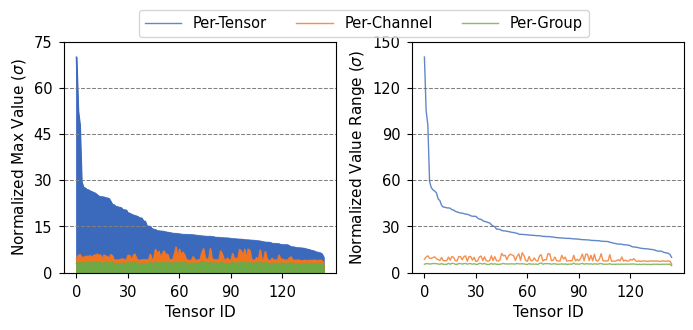

In [58]:
transparency = 0.6
title_loc = 1.4

tick_size    = 10.5
label_size   = 11
title_size   = 11
legend_size  = 10.5
text_size    = 10.5

f, ax_all = plt.subplots(1, 2)
fig_width     = 8
fig_height    = 3.
f.set_figwidth(fig_width)
f.set_figheight(fig_height)
f_list = []


j = 0
ax = ax_all[j]
for idx, label in enumerate(labels):
    x_value = np.arange(len(layer_name_outlier))
    y_value = np.array(outlier_config[idx])
    color   = COLOR_LIST_DEFAULT[idx]
    f1, = ax.plot(x_value, y_value, color=color, linewidth=1, alpha=0.8)
    f2  = ax.fill_between(x_value, y_value, where=(y_value >= 0), interpolate=True, color=color)
    f_list.append(f1)
    

y_max = max(tensor_outlier_config) + 5
ax.set_ylim(0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier), 30))
ax.set_yticks(np.arange(0., y_max+1, 15))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Max Value ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')



j = 1
ax = ax_all[j]
for idx, label in enumerate(labels):
    ax.plot(np.arange(len(layer_name_outlier)), range_config[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, alpha=0.8)

y_max = max(tensor_range_config) + 10
ax.set_ylim(0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier), 30))
ax.set_yticks(np.arange(0., y_max+1, 30))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Value Range ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')


legend_loc=[0.5, 1.01]
f.legend(f_list, labels, loc='upper center', bbox_to_anchor=legend_loc, 
         ncol=3, columnspacing=2, handlelength=2.5, fontsize=legend_size)
f.subplots_adjust(wspace=0.28, hspace=0.55)
#f.savefig('kl_div_comparison.svg', dpi=600, bbox_inches='tight')

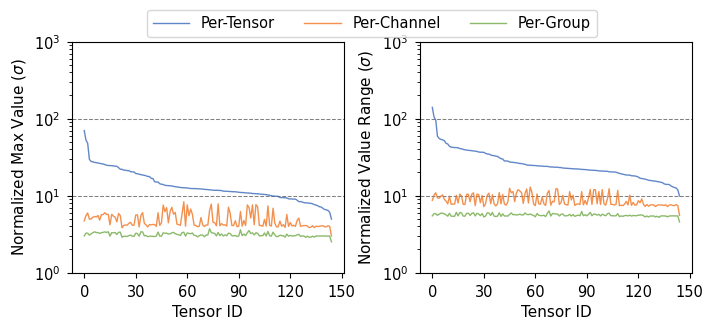

In [48]:
transparency = 0.6
title_loc = 1.4

tick_size    = 10.5
label_size   = 11
title_size   = 11
legend_size  = 10.5
text_size    = 10.5

f, ax_all = plt.subplots(1, 2)
fig_width     = 8
fig_height    = 3.
f.set_figwidth(fig_width)
f.set_figheight(fig_height)


j = 0
ax = ax_all[j]
for idx, label in enumerate(labels):
    ax.plot(np.arange(len(layer_name_outlier)), outlier_config[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, alpha=0.8)

ax.set_yscale("log")
y_max = 1e3
ax.set_ylim(1e0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier)+15, 30))
ax.set_yticks([1e0, 1e1, 1e2, 1e3])
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Max Value ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')



j = 1
ax = ax_all[j]
for idx, label in enumerate(labels):
    ax.plot(np.arange(len(layer_name_outlier)), range_config[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, alpha=0.8)

ax.set_yscale("log")
y_max = 1e3
ax.set_ylim(1e0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier)+15, 30))
ax.set_yticks([1e0, 1e1, 1e2, 1e3])
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Value Range ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')


legend_loc=[0.5, 1.01]
leg = f.legend(labels, loc='upper center', bbox_to_anchor=legend_loc, 
             ncol=3, columnspacing=2, handlelength=2.5, fontsize=legend_size)
f.subplots_adjust(wspace=0.28, hspace=0.55)
#f.savefig('kl_div_comparison.svg', dpi=600, bbox_inches='tight')

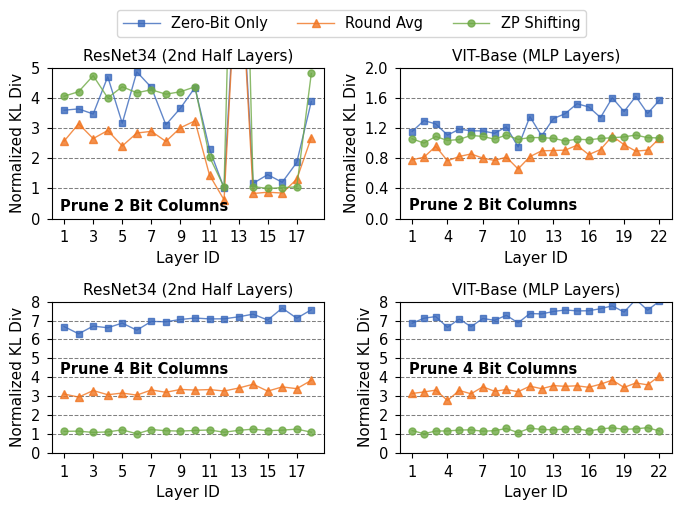

In [12]:
transparency = 0.6
title_loc = 1.4

tick_size    = 10.5
label_size   = 11
title_size   = 11
legend_size  = 10.5
text_size    = 10.5

f, ax_all = plt.subplots(2, 2)
fig_width     = 8
fig_height    = 5.
f.set_figwidth(fig_width)
f.set_figheight(fig_height)



i = 0
j = 0
df = df_all[i][j]
ax = ax_all[i][j]
for idx, label in enumerate(labels):
    ax.plot(df.columns, df.iloc[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, marker=marker_type[idx], markersize=marker_size[idx], 
             alpha=0.8)

ax.set_ylim(0, 5)
ax.set_xticks(np.arange(1, len(df.columns), 2))
ax.set_yticks(np.arange(0., 5.01, 1.))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized KL Div', fontsize=label_size, labelpad=4)
ax.set_xlabel('Layer ID', fontsize=label_size, labelpad=4)

ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')



i = 0
j = 1
df = df_all[i][j]
ax = ax_all[i][j]
for idx, label in enumerate(labels):
    ax.plot(df.columns, df.iloc[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, marker=marker_type[idx], markersize=marker_size[idx], 
             alpha=0.8)

ax.set_ylim(0, 2)
ax.set_xticks(np.arange(1, len(df.columns)+1, 3))
ax.set_yticks(np.arange(0, 2.01, 0.4))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized KL Div', fontsize=label_size, labelpad=4)
ax.set_xlabel('Layer ID', fontsize=label_size, labelpad=4)

ax.set_title('VIT-Base (MLP Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

ax.text(0.7, 0.11, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')




i = 1
j = 0
df = df_all[i][j]
ax = ax_all[i][j]
for idx, label in enumerate(labels):
    ax.plot(df.columns, df.iloc[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, marker=marker_type[idx], markersize=marker_size[idx], 
             alpha=0.8)

ax.set_ylim(0, 5)
ax.set_xticks(np.arange(1, len(df.columns), 2))
ax.set_yticks(np.arange(0., 8.01, 1.))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized KL Div', fontsize=label_size, labelpad=4)
ax.set_xlabel('Layer ID', fontsize=label_size, labelpad=4)

ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

ax.text(0.7, 4.15, 'Prune 4 Bit Columns',  color='black', fontsize=text_size, weight='bold')



i = 1
j = 1
df = df_all[i][j]
ax = ax_all[i][j]
for idx, label in enumerate(labels):
    ax.plot(df.columns, df.iloc[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, marker=marker_type[idx], markersize=marker_size[idx], 
             alpha=0.8)

ax.set_ylim(0, 2)
ax.set_xticks(np.arange(1, len(df.columns)+1, 3))
ax.set_yticks(np.arange(0, 8.01, 1))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized KL Div', fontsize=label_size, labelpad=4)
ax.set_xlabel('Layer ID', fontsize=label_size, labelpad=4)

ax.set_title('VIT-Base (MLP Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

ax.text(0.7, 4.15, 'Prune 4 Bit Columns',  color='black', fontsize=text_size, weight='bold')



legend_loc=[0.5, 1.01]
leg = f.legend(labels, loc='upper center', bbox_to_anchor=legend_loc, 
             ncol=3, columnspacing=2, handlelength=2.5, fontsize=legend_size)
f.subplots_adjust(wspace=0.28, hspace=0.55)
f.savefig('kl_div_comparison.svg', dpi=600, bbox_inches='tight')